In [1]:
import numpy as np
import tifffile as tf
import os
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from skimage import io

In [2]:
def projection_3d(data,x_scale,y_scale,z_scale,space,colormapname,caxis,projection_type,ifcolorbar,ifsave,savepath):
    # projection_type: 0-max;1-mean
    if projection_type == 0:
        data_px = np.max(data,0)
        data_py = np.max(data,1)
        data_pz = np.max(data,2)
    else:
        data_px = np.mean(data,0)
        data_py = np.mean(data,1)
        data_pz = np.mean(data,2)
    # plot
    x_scale = int(x_scale)
    y_scale = int(y_scale)
    z_scale = int(z_scale)
    plt.figure(figsize=(6,6))
    grid = plt.GridSpec(y_scale + z_scale + space, x_scale + z_scale + space)
    plt.subplot(grid[0:y_scale,0:x_scale])
    if len(caxis)>0:
        plt.imshow(data_pz,cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(data_pz,cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    plt.subplot(grid[0:y_scale,x_scale+space:x_scale+z_scale+space]) # y
    if len(caxis)>0:
        plt.imshow(data_py[:,::-1],cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(data_py[:,::-1],cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    plt.subplot(grid[y_scale+space:y_scale+z_scale+space,0:x_scale]) # x
    if len(caxis)>0:
        plt.imshow(np.transpose(data_px[:,::-1]),cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(np.transpose(data_px[:,::-1]),cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    if ifcolorbar:
        plt.subplot(grid[y_scale+space:y_scale+z_scale+space,x_scale+space:x_scale+z_scale+space]) 
        if len(caxis)>0:
            plt.imshow(data_py,cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
        else:
            plt.imshow(data_py,cmap = colormapname,aspect = 'auto')
        plt.xticks([]),plt.yticks([])
        plt.colorbar()
    if ifsave:
        plt.savefig(savepath, dpi = 300)
    plt.show()
    plt.close()

In [3]:
result_path = '../results/nsyb-G7f-rAch1h/figures-for-revision1/ensemble_significance/rAch'
file_name_1 = 'map_response_difference.npy'
file_name_2 = 'map_response_p.npy'
ifsave  = True
fly_selected_list = [0,1,2,3,4,5,6,7,8,9]
num_channel = 2
if ifsave:
    final_result_path = os.path.abspath(result_path + '/' + 'summary-2')
    folder = os.path.exists(final_result_path)
    if not folder:
        os.makedirs(final_result_path)
if ifsave:
    final_result_path_tif = os.path.abspath(final_result_path + '/' + 'tif')
    folder = os.path.exists(final_result_path_tif)
    if not folder:
        os.makedirs(final_result_path_tif)

In [4]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly3/data',
                        '20230428-nsyb-G7f-rAch1h/fly1/data',
                        '20230507-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly3/data',
                        '20230515-nsyb-G7f-rAch1h/fly1/data']
# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']
data_path = '../../data'

atlas_path = data_path
atlas_name = 'align_to_atlas/Transformed_atlas.tif'
atlas_z_range = range(13,38)

channel 0
fly 0
fly 1
fly 2
fly 3
fly 4
fly 5
fly 6
fly 7
fly 8
fly 9


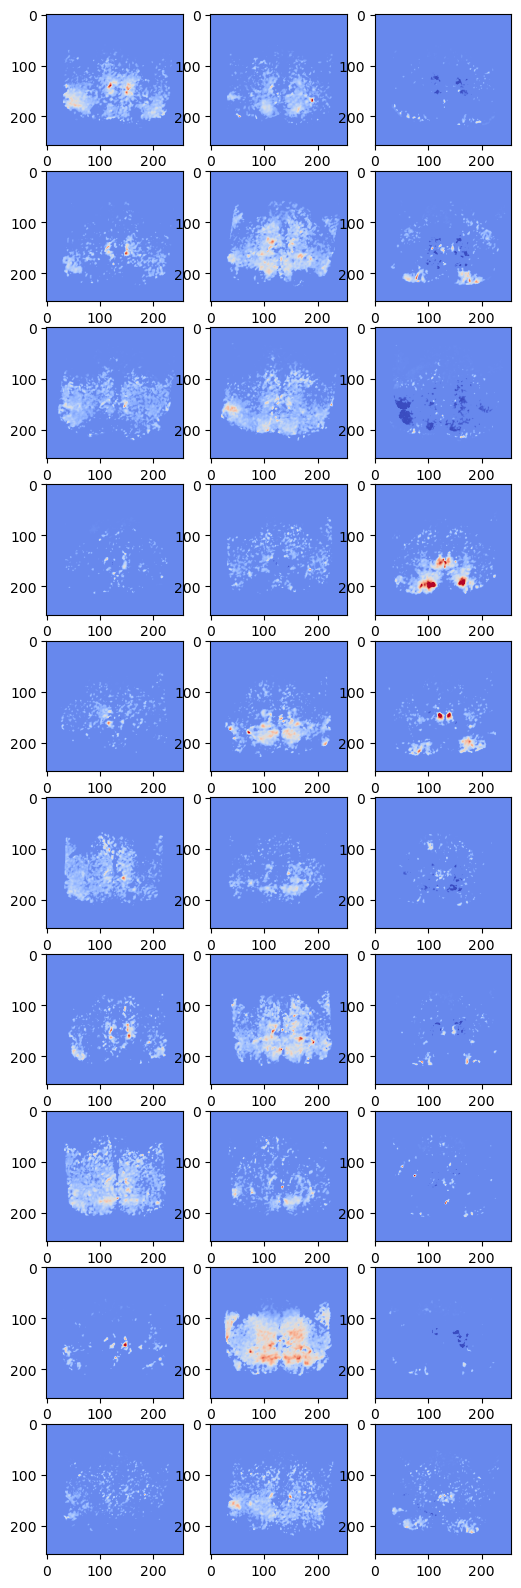

channel 1
fly 0
fly 1
fly 2
fly 3
fly 4
fly 5
fly 6
fly 7
fly 8
fly 9


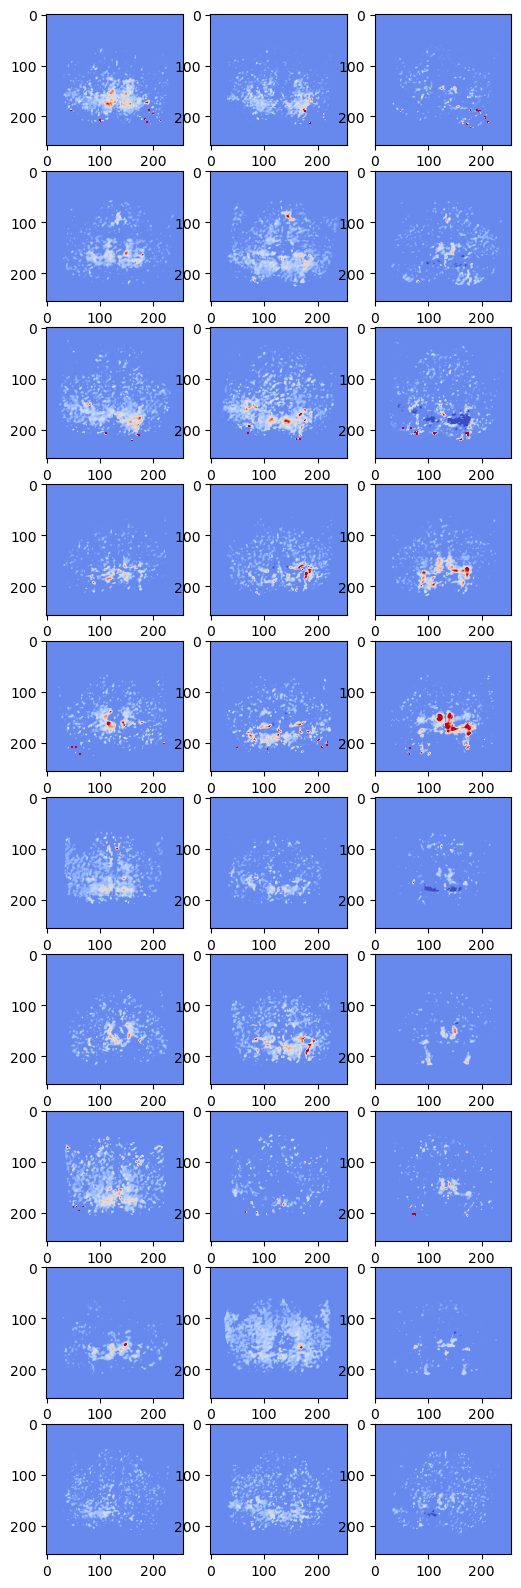

In [5]:
num_fly = len(fly_selected_list)
the_map_max = []
the_map_min = []
for i in range(num_channel):
    print('channel '+str(i))
    plt.figure(figsize = (6,20))
    for fly_selected in fly_selected_list:
        # load data
        data = np.load(result_path+'/fly_'+str(fly_selected)+'_'+file_name_1)
        data_p = np.load(result_path+'/fly_'+str(fly_selected)+'_'+file_name_2)
        # load atlas
        file_folder_1 = file_folder_list_1[fly_selected]
        file_folder_2 = file_folder_1[:-5]
        atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
        atlas = np.transpose(atlas,[1,2,0])
        atlas = atlas[:,:,atlas_z_range]
        # print('load atlas done! size:')
        # print(np.shape(atlas))a
        atlas_mask = atlas>0
        print('fly '+str(fly_selected))
        # print(np.shape(data))
        num_stim = np.size(data,3)
        for j in range(num_stim):
            plt.subplot(num_fly,num_stim,fly_selected*num_stim+j+1)
            the_map = data[:,:,:,j,i]*(data_p[:,:,:,j,i]<0.05)
            the_map = the_map*atlas_mask
            the_map_max.append(np.max(the_map))
            the_map_min.append(np.min(the_map))
            the_map_xy = the_map.max(2)
            plt.imshow(the_map_xy,cmap = 'coolwarm',vmin = -0.1,vmax = 0.6,aspect = 'auto')
            # projection_3d(the_map,458,458,100,30,'coolwarm',[-0.1,0.6],0,True,False,[])
    plt.savefig(final_result_path+'/'+'channel_'+str(i+1)+'.png', dpi = 300)
    plt.show()
            

In [6]:
# print(np.max(the_map_max))
# print(np.min(the_map_min))
# print(the_map_max)
# print(the_map_min)

channel 0
load atlas done! size:
(256, 256, 25)
fly 0
(256, 256, 25, 3, 2)


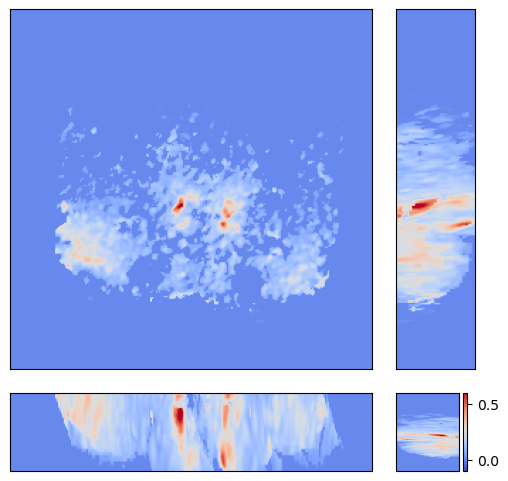

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


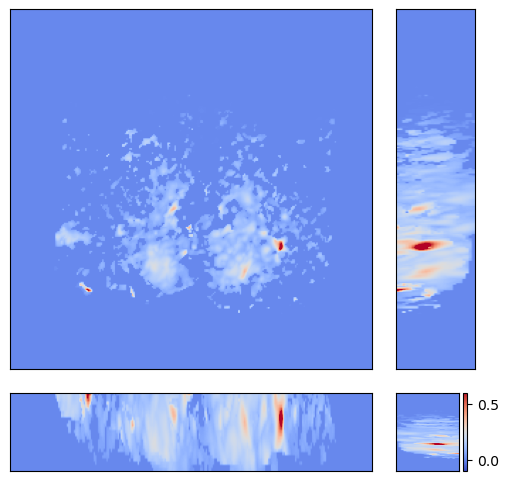

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


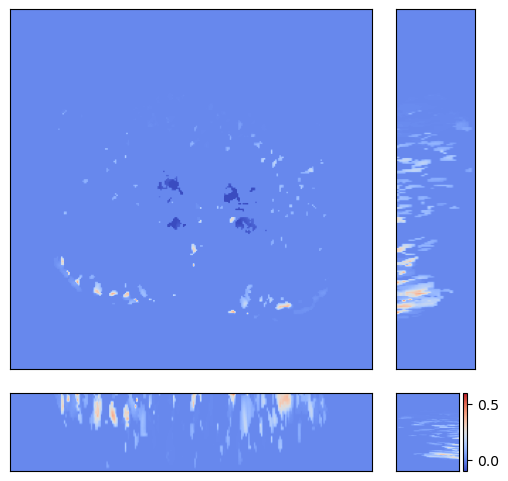

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 1
(256, 256, 25, 3, 2)


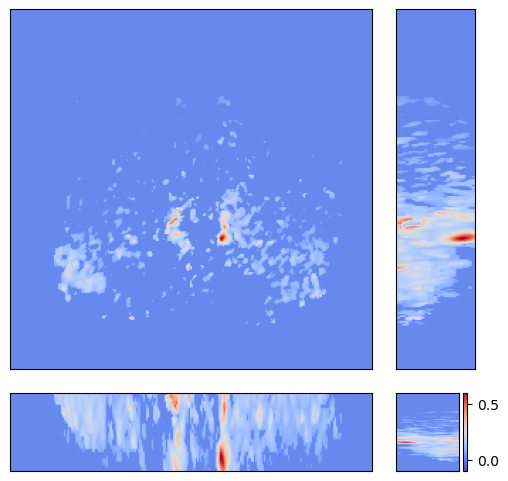

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


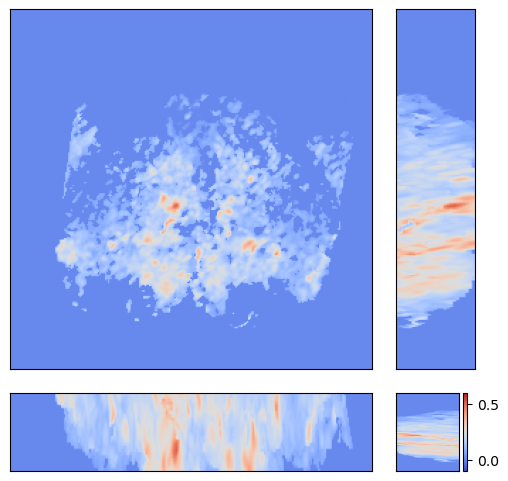

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


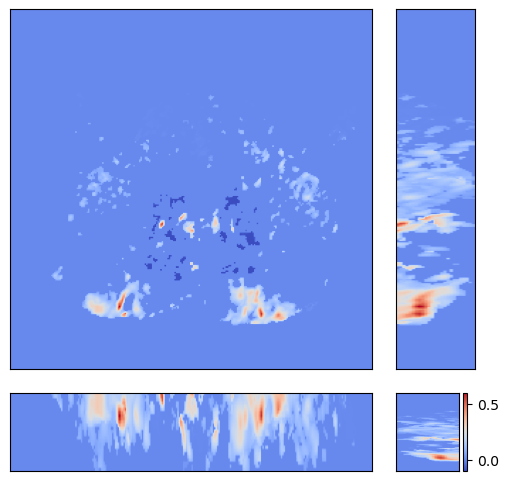

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 2
(256, 256, 25, 3, 2)


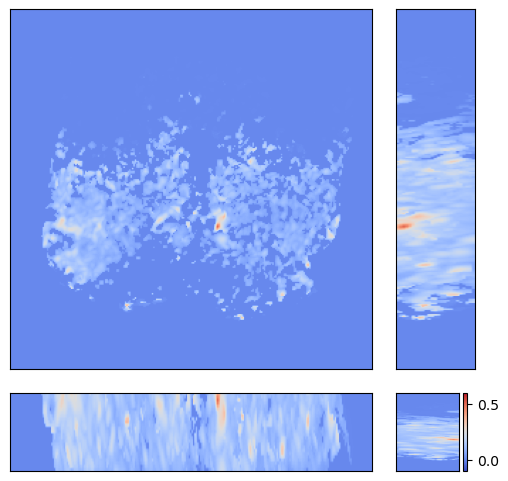

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


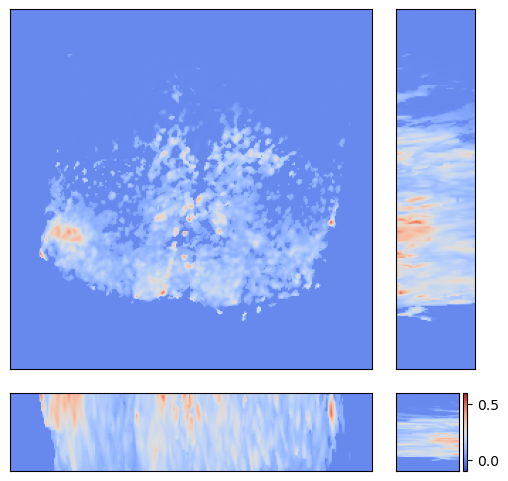

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


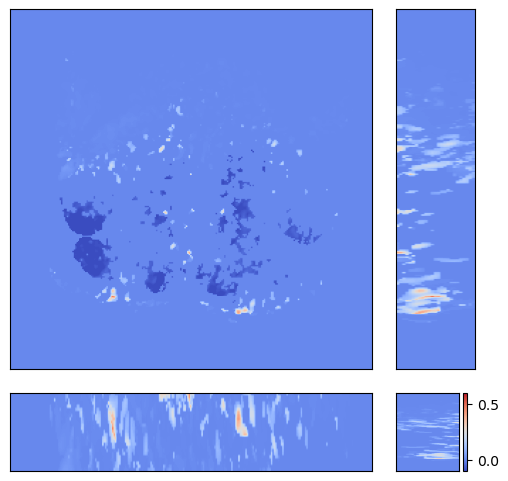

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 3
(256, 256, 25, 3, 2)


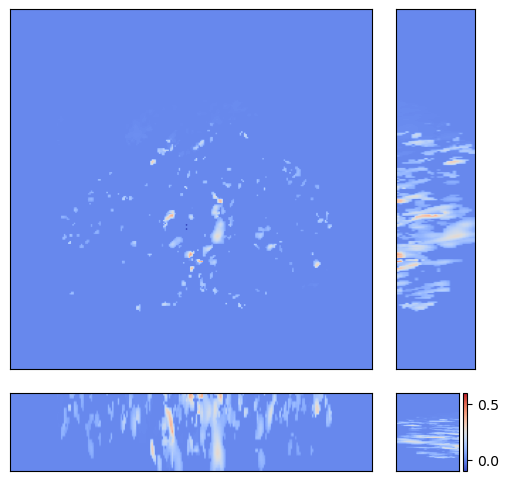

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


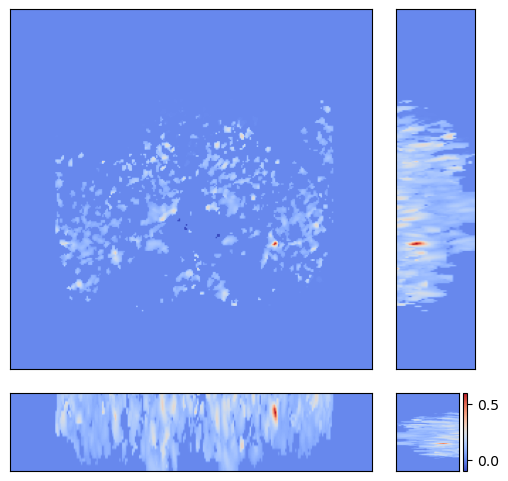

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


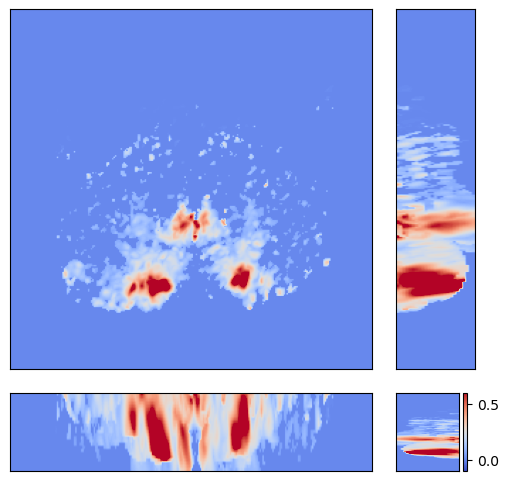

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 4
(256, 256, 25, 3, 2)


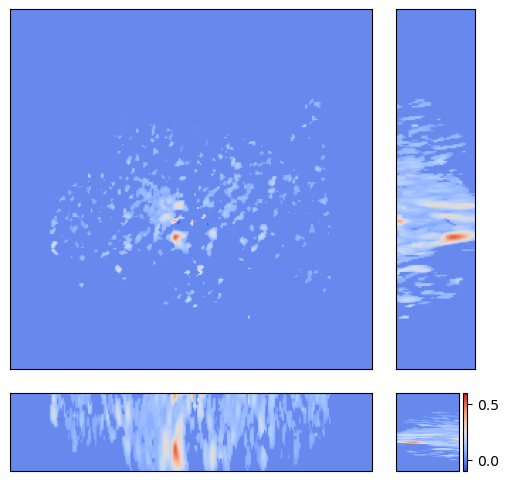

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


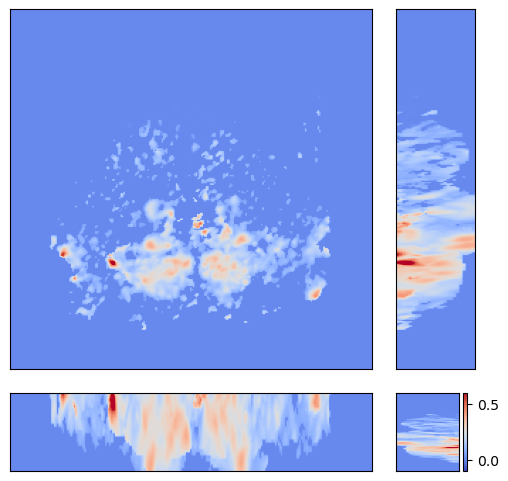

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


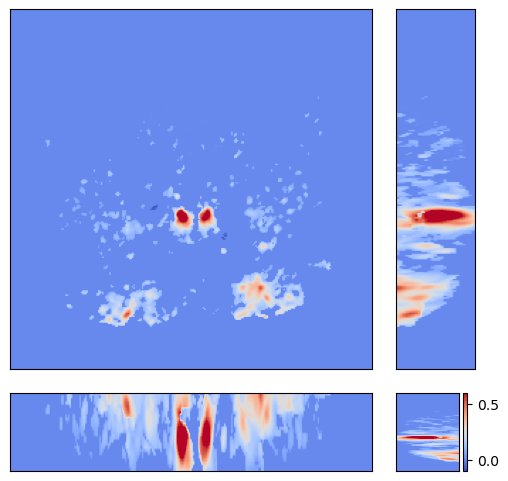

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 5
(256, 256, 25, 3, 2)


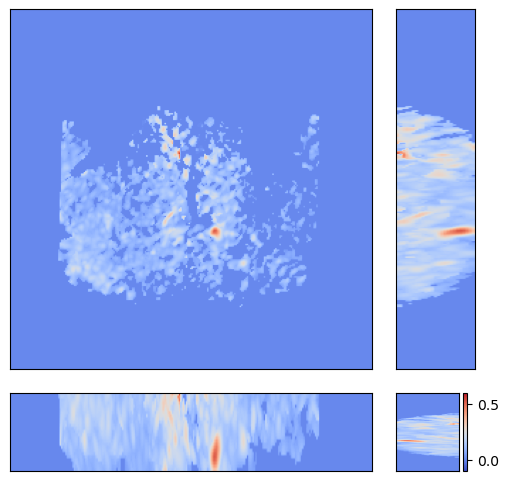

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


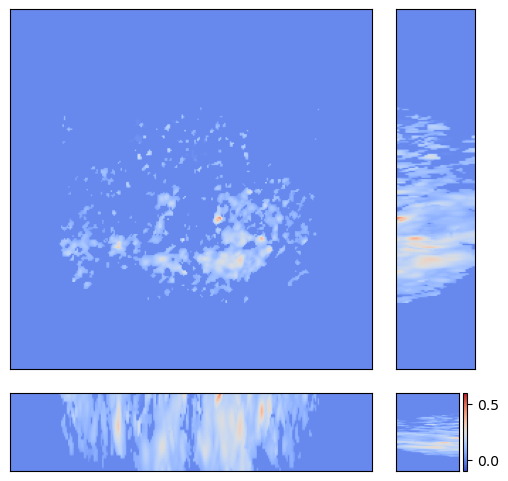

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


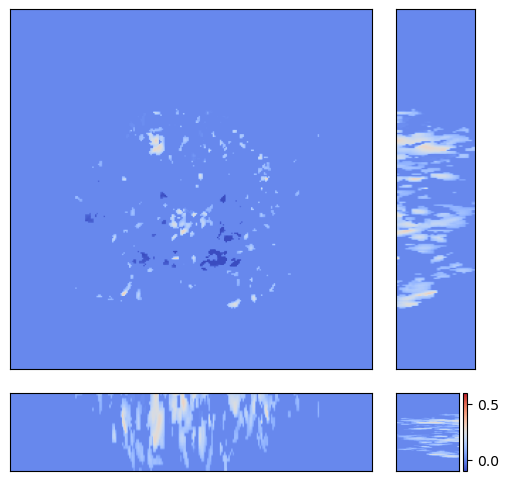

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 6
(256, 256, 25, 3, 2)


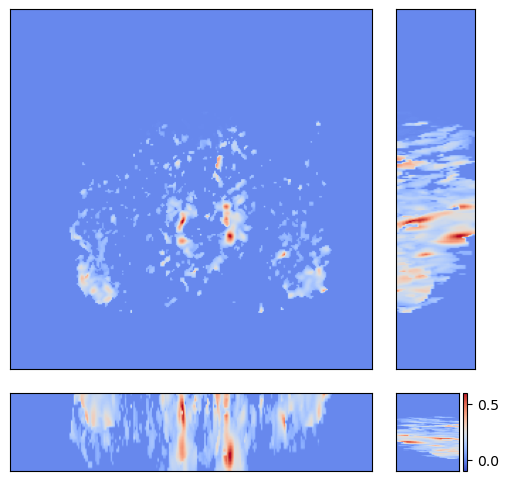

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


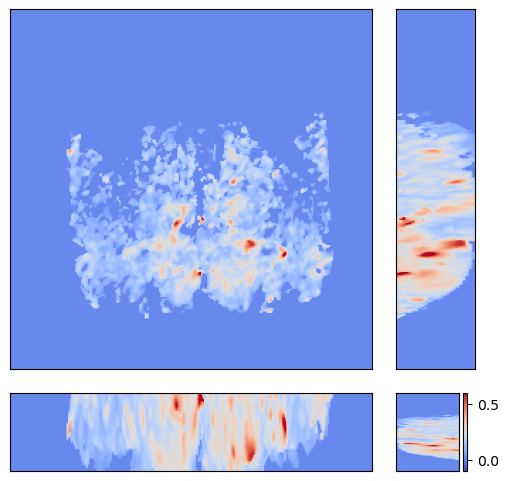

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


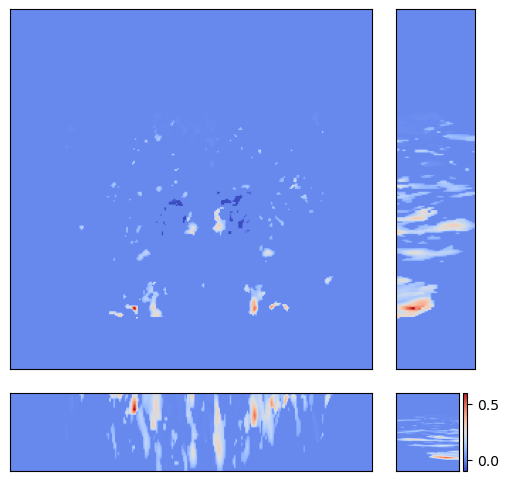

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 7
(256, 256, 25, 3, 2)


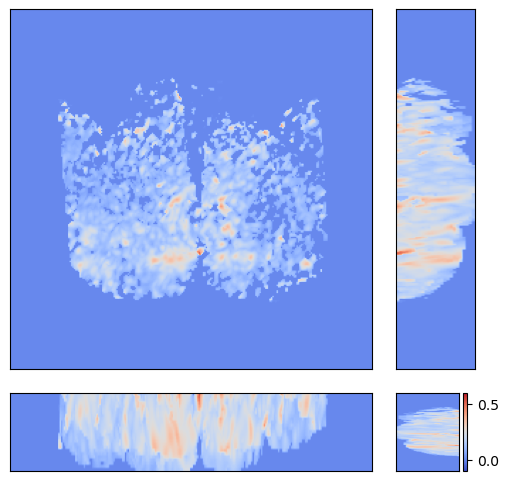

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


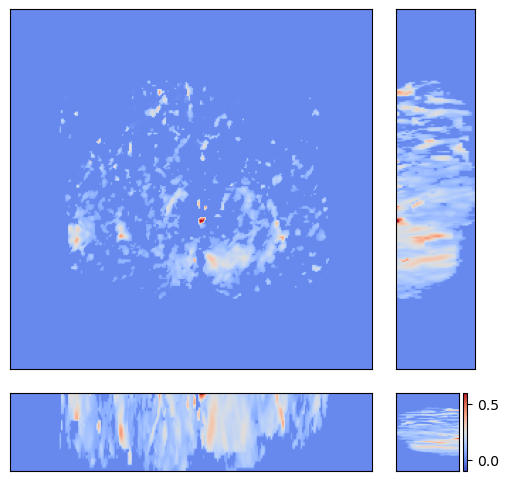

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


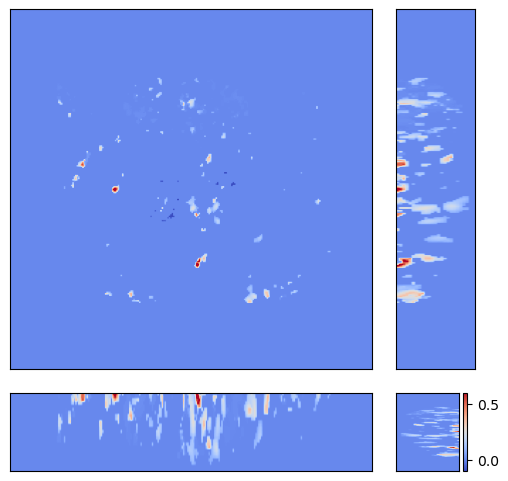

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 8
(256, 256, 25, 3, 2)


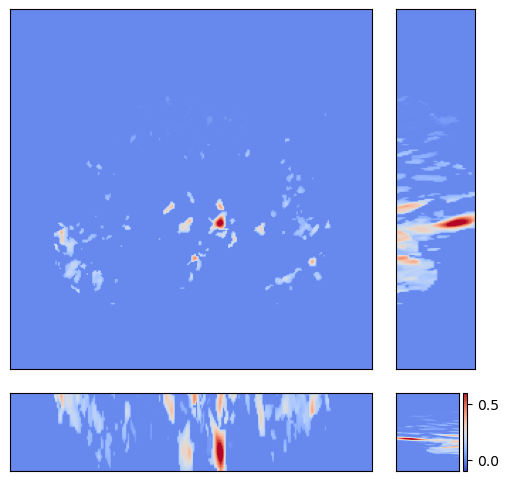

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


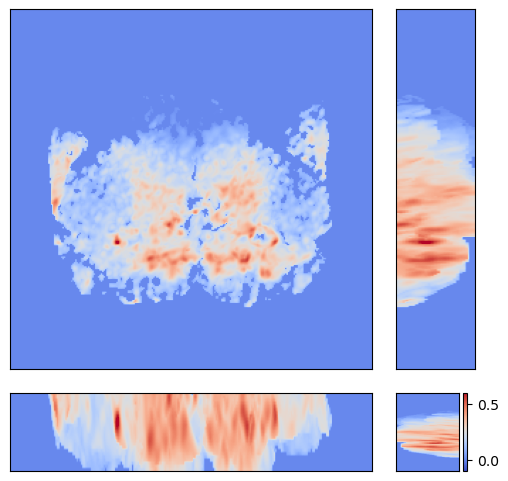

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


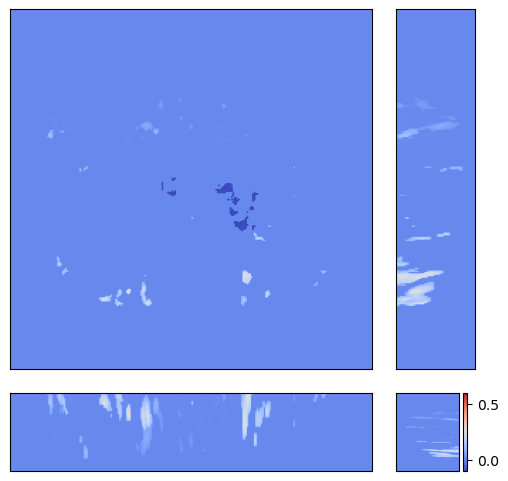

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 9
(256, 256, 25, 3, 2)


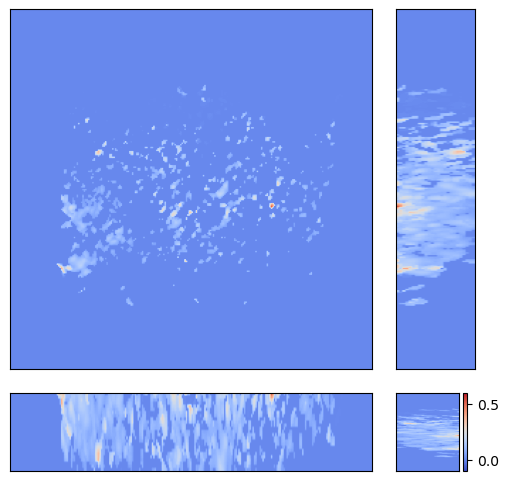

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_1_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


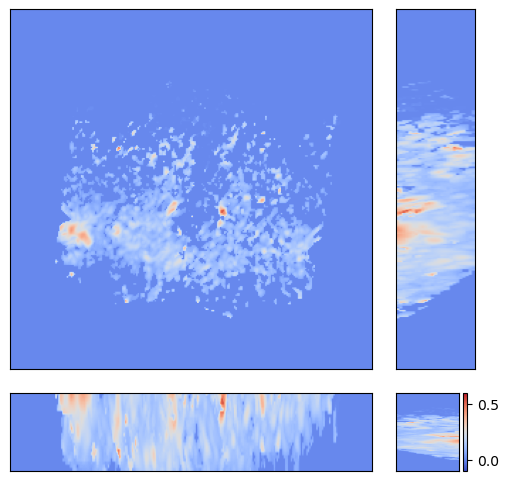

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_1_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


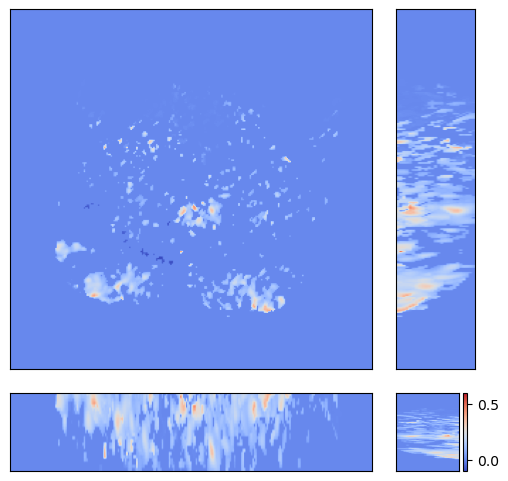

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_1_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


channel 1
load atlas done! size:
(256, 256, 25)
fly 0
(256, 256, 25, 3, 2)


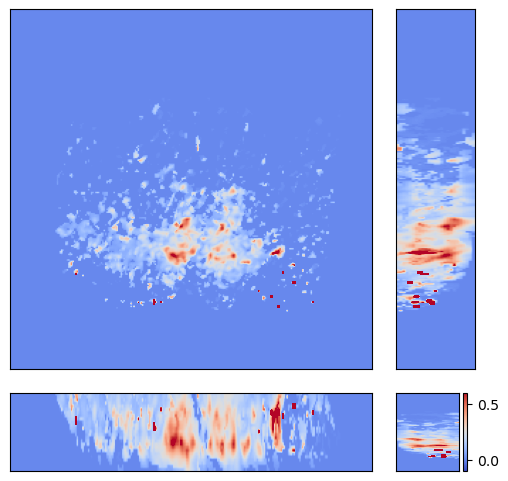

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


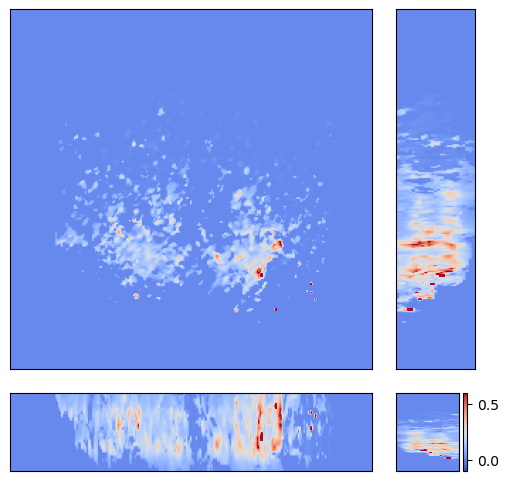

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


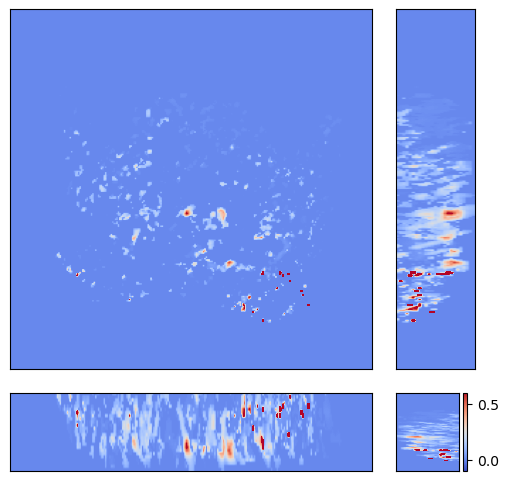

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_0_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 1
(256, 256, 25, 3, 2)


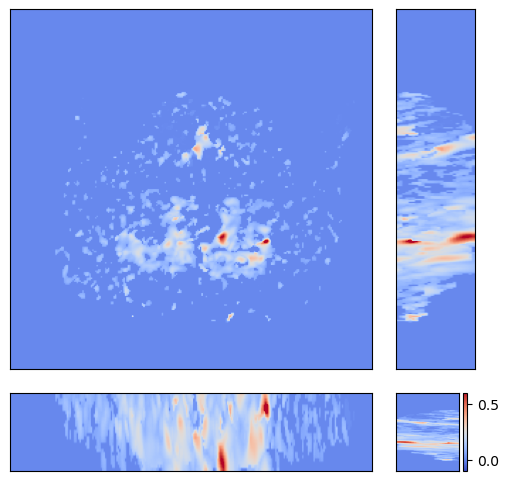

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


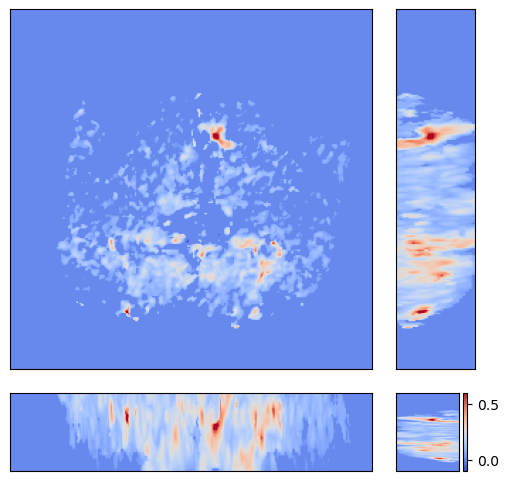

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


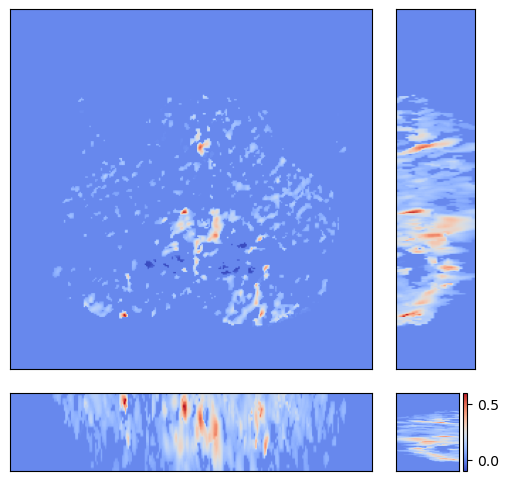

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_1_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 2
(256, 256, 25, 3, 2)


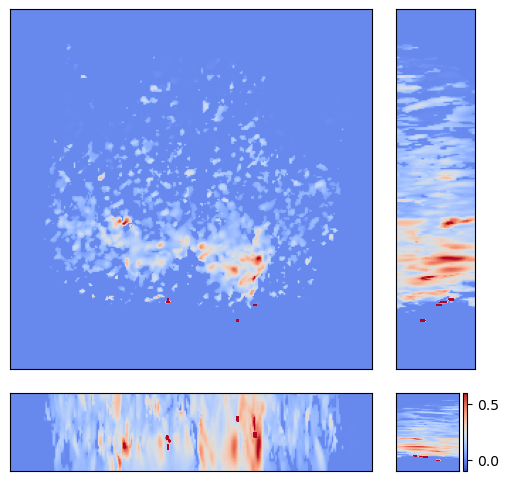

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


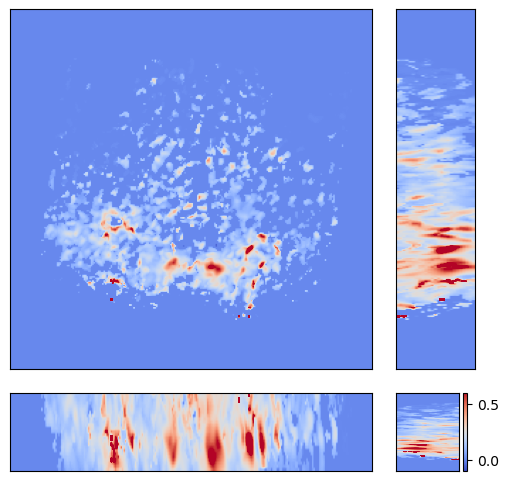

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


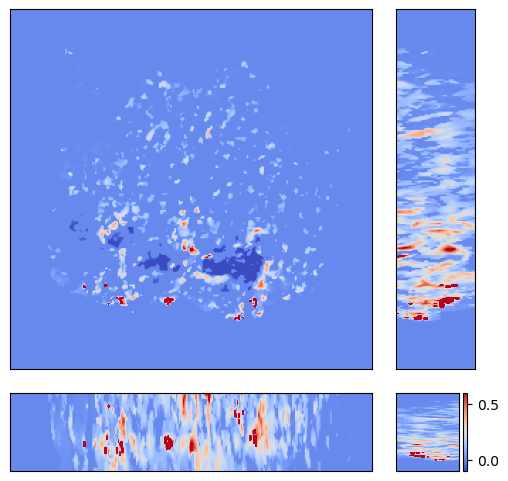

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_2_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 3
(256, 256, 25, 3, 2)


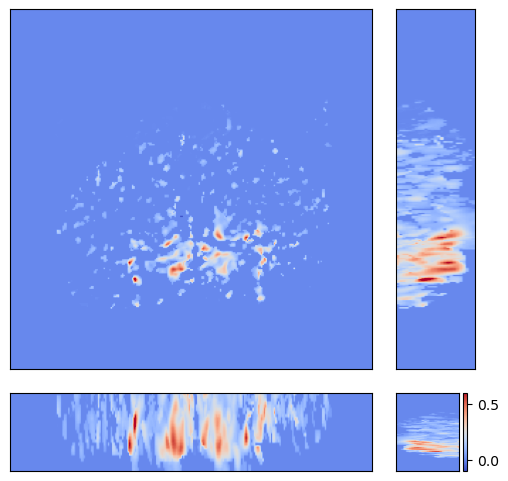

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


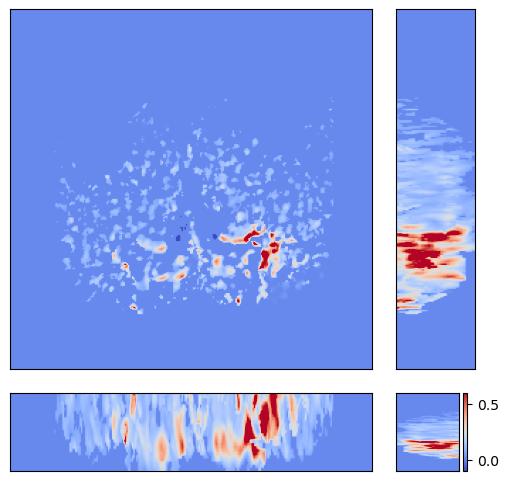

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


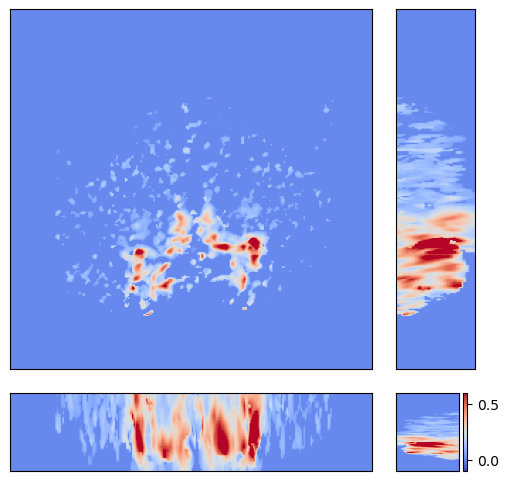

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_3_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 4
(256, 256, 25, 3, 2)


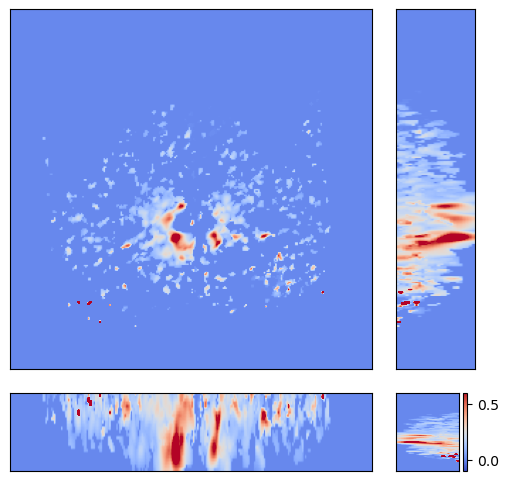

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


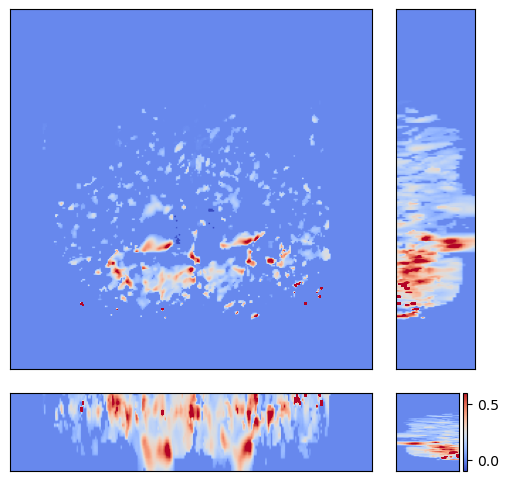

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


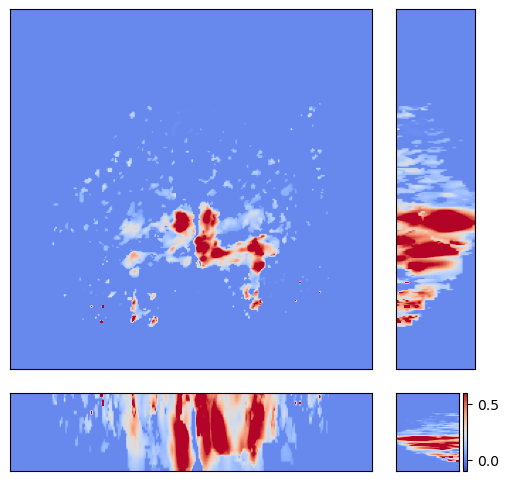

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_4_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 5
(256, 256, 25, 3, 2)


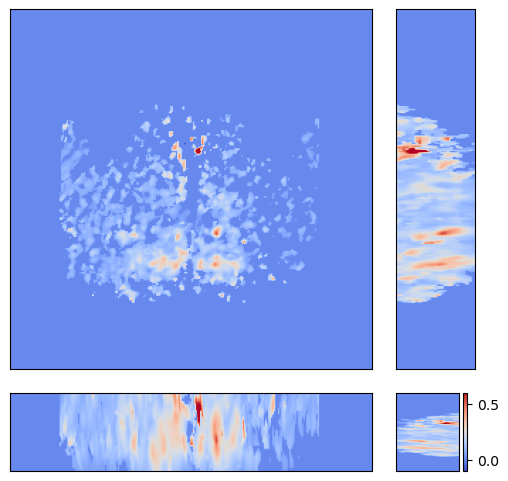

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


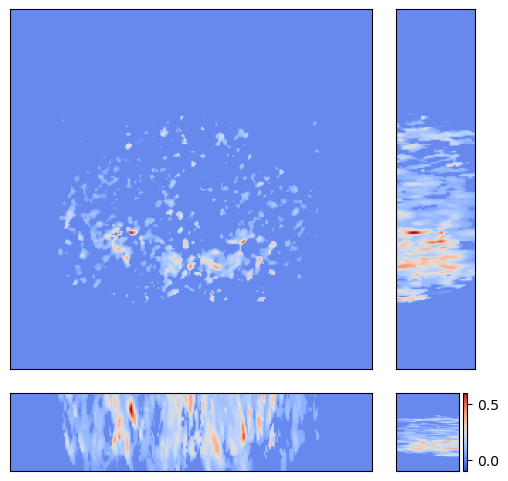

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


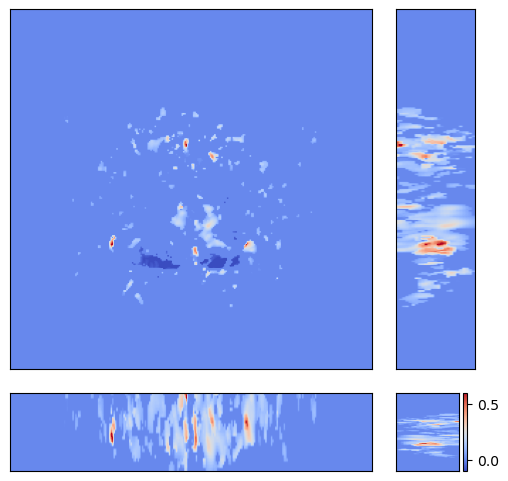

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_5_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 6
(256, 256, 25, 3, 2)


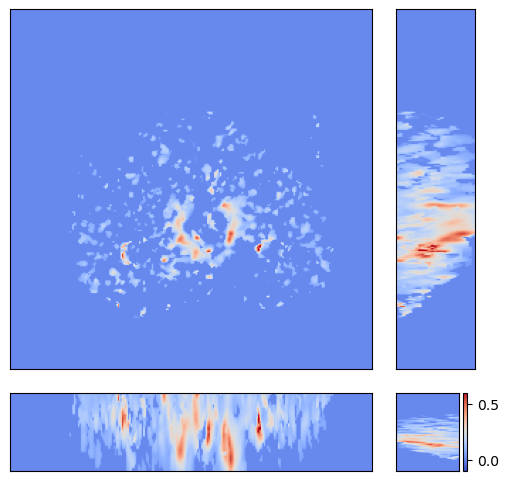

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


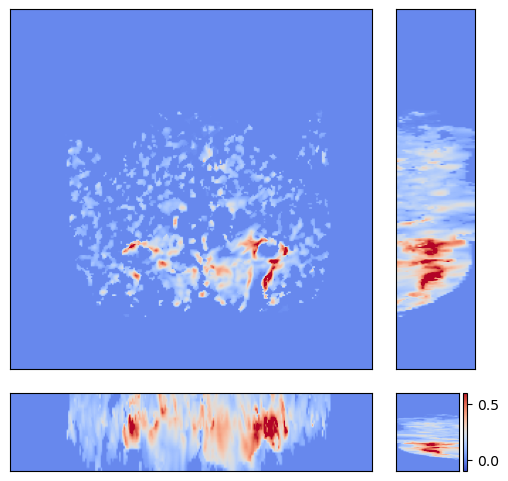

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


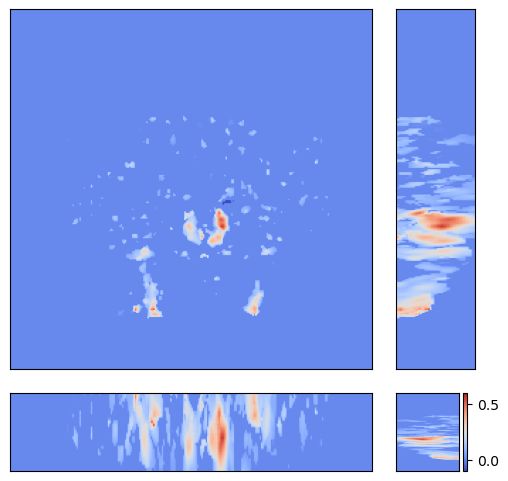

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_6_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 7
(256, 256, 25, 3, 2)


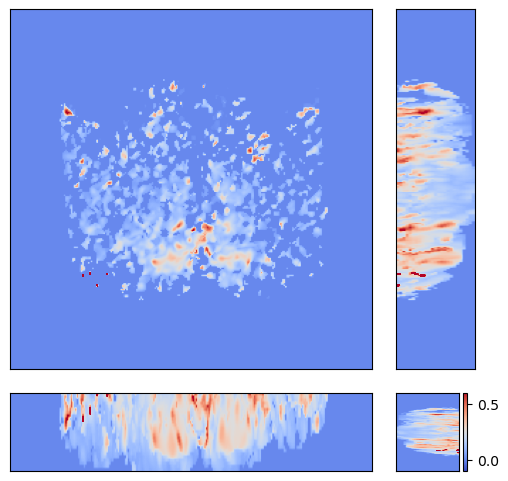

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


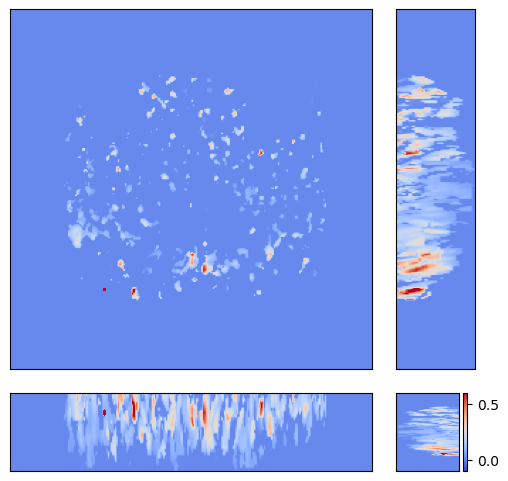

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


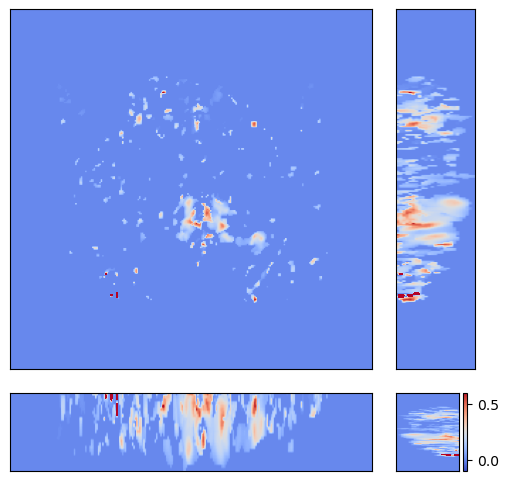

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_7_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 8
(256, 256, 25, 3, 2)


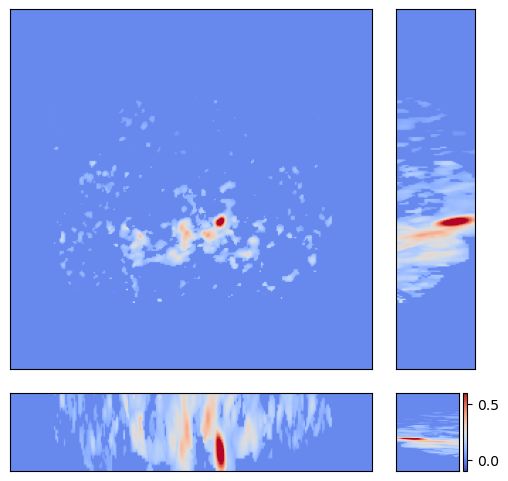

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


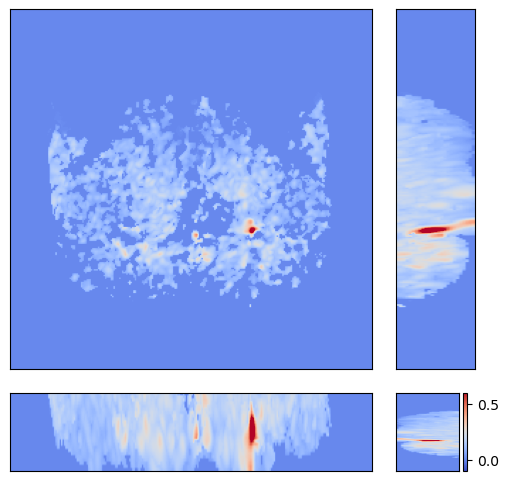

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


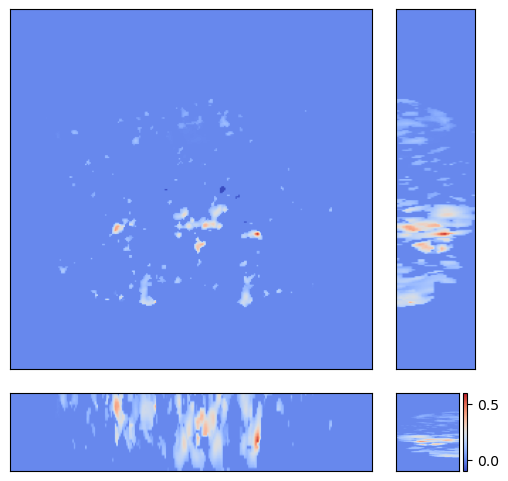

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_8_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


load atlas done! size:
(256, 256, 25)
fly 9
(256, 256, 25, 3, 2)


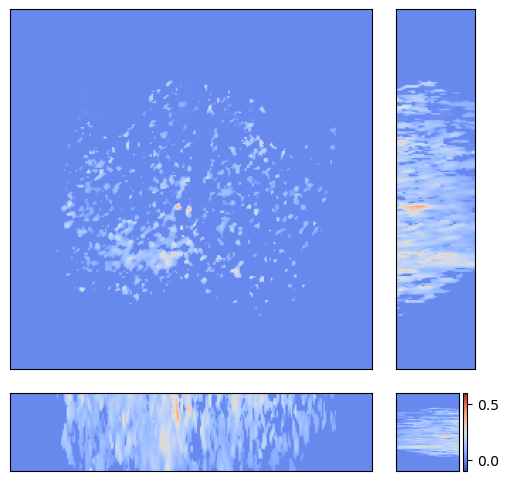

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_2_odor_1.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


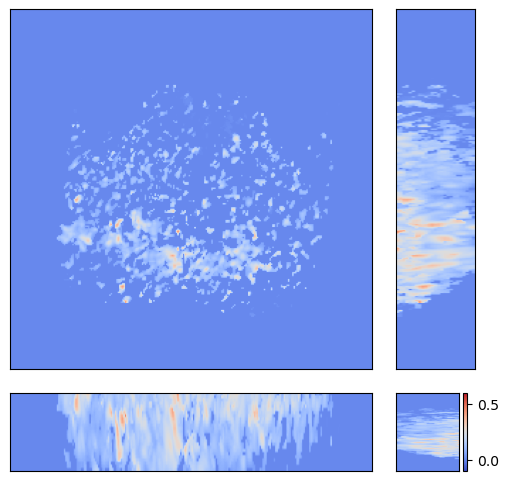

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_2_odor_2.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


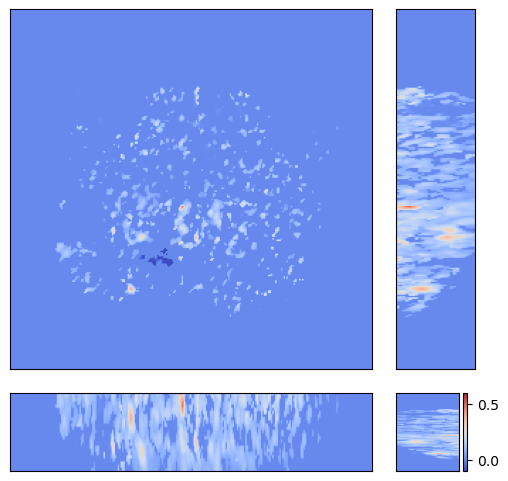

C:\Users\GTH\AppData\Local\Temp\ipykernel_906500\1456853143.py:28: UserWarning: z:\0-FJQ\olfactory_representation\pipeline-revision\results\nsyb-G7f-rAch1h\figures-for-revision1\ensemble_significance\rAch\summary-2\tif/fly_9_channel_2_odor_3.tif is a low contrast image
  io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))


In [7]:
num_fly = len(fly_selected_list)
for i in range(num_channel):
    print('channel '+str(i))
    # plt.figure()
    for fly_selected in fly_selected_list:
        # load data
        data = np.load(result_path+'/fly_'+str(fly_selected)+'_'+file_name_1)
        data_p = np.load(result_path+'/fly_'+str(fly_selected)+'_'+file_name_2)
        # load atlas
        file_folder_1 = file_folder_list_1[fly_selected]
        file_folder_2 = file_folder_1[:-5]
        atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
        atlas = np.transpose(atlas,[1,2,0])
        atlas = atlas[:,:,atlas_z_range]
        print('load atlas done! size:')
        print(np.shape(atlas))
        atlas_mask = atlas>0
        print('fly '+str(fly_selected))
        print(np.shape(data))
        num_stim = np.size(data,3)
        for j in range(num_stim):
            # plt.subplot(num_fly,num_stim,fly_selected*num_stim+j+1)
            the_map = data[:,:,:,j,i]*(data_p[:,:,:,j,i]<0.05)
            the_map = the_map*atlas_mask
            projection_3d(the_map,458,458,100,30,'coolwarm',[-0.1,0.6],0,True,ifsave,final_result_path+'/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.png')
            if ifsave:
                the_map = np.transpose(the_map,[2,0,1])
                io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', ((the_map+3)/2*10000).astype(np.uint16))
                # io.imsave(final_result_path_tif + '/fly_'+str(fly_selected)+'_channel_'+str(i+1)+'_odor_'+str(j+1)+'.tif', the_map.astype(np.float32))
    # plt.show()
            

In [8]:
# fly_selected = 1
# # load data
# file_folder_1 = file_folder_list_1[fly_selected]
# path_file_0 = data_path + '/' + file_folder_1 + '/' + file_name[0] + '.npy'
# path_file_1 = data_path + '/' + file_folder_1 + '/' + file_name[1] + '.npy'
# data_1 = np.load(path_file_0)
# # data_1 = data_1.astype(np.float16)
# data_1 = np.transpose(data_1,[3,4,2,1,0])
# data_2 = np.load(path_file_1)
# # data_2 = data_2.astype(np.float16)
# data_2 = np.transpose(data_2,[3,4,2,1,0])
# size_x = np.size(data_1,0)
# size_y = np.size(data_1,1)
# size_z = np.size(data_1,2)
# num_tp = np.size(data_1,3)
# num_trial = np.size(data_1,4)
# data = np.concatenate((data_1,data_2),axis = 4)
# del data_1,data_2
# data = data.reshape(size_x,size_y,size_z,num_tp,num_trial,num_channel,order = 'F')
# print('load data done! size:')
# print(np.shape(data))
# # load atlas
# file_folder_2 = file_folder_1[:-5]
# atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
# atlas = np.transpose(atlas,[1,2,0])
# atlas = atlas[:,:,atlas_z_range]
# print('load atlas done! size:')
# print(np.shape(atlas))
# atlas_mask = atlas>0


# ## process
# stim_kind = np.unique(stim)
# map_response_auc = compute_auc_dff0(data)
# print(np.shape(map_response_auc))
# map_response_difference = np.zeros((size_x,size_y,size_z,len(stim_kind),num_channel))
# map_response_p = np.zeros((size_x,size_y,size_z,len(stim_kind),num_channel))
# for j in range(len(stim_kind)):
#     a = np.squeeze(map_response_auc[:,:,:,stim==j+1,:])
#     b = np.squeeze(map_response_auc[:,:,:,stim!=j+1,:])
#     res = mannwhitneyu(a,b,axis = 3)
#     p = res.pvalue
#     map_response_difference[:,:,:,j,:] = np.mean(a,3)-np.mean(b,3)
#     map_response_p[:,:,:,j,:] = p
#     for i in range(num_channel):
#         map_1 = map_response_difference[:,:,:,j,i]
#         map_2 = map_response_p[:,:,:,j,i]
#         map_1 = map_1*atlas_mask
#         map_2 = map_2*atlas_mask
#         print(np.shape(map_1))
#         print(np.shape(map_2))
#         print('channel '+str(i+1)+', odor '+str(j+1))
#         # projection_3d(map_1,458,458,100,30,'jet',[],0,True,
#         #                 ifsave,final_result_path+'/fly_'+str(fly_selected)+'_map_response_difference_channel_'+str(i+1)+'_odor_'+str(j+1)+'.png')
#         projection_3d(map_2,458,458,100,30,'jet',[],0,True,
#                         ifsave,final_result_path+'/fly_'+str(fly_selected)+'_map_response_p_channel_'+str(i+1)+'_odor_'+str(j+1)+'.png')
#         the_map = map_1*(map_2<0.05)
#         projection_3d(the_map,458,458,100,30,'jet',[],0,True,
#                         ifsave,final_result_path+'/fly_'+str(fly_selected)+'_map_response_dp_channel_'+str(i+1)+'_odor_'+str(j+1)+'.png')
        
# np.save(final_result_path+'/fly_'+str(fly_selected)+'_map_response_difference.npy',map_response_difference)
# np.save(final_result_path+'/fly_'+str(fly_selected)+'_map_response_p.npy',map_response_p)
